# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:** Kacper Pastuła, gr. lab 6



<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%load_ext memory_profiler

---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

In [2]:
print(main.spare_matrix_Abt(6,5))


(array([[1.    , 0.    , 0.    , 0.    , 0.    ],
       [1.    , 0.2   , 0.04  , 0.008 , 0.0016],
       [1.    , 0.4   , 0.16  , 0.064 , 0.0256],
       [1.    , 0.6   , 0.36  , 0.216 , 0.1296],
       [1.    , 0.8   , 0.64  , 0.512 , 0.4096],
       [1.    , 1.    , 1.    , 1.    , 1.    ]]), array([ 1.        ,  0.69670671, -0.02919952, -0.73739372, -0.99829478,
       -0.65364362]))


---

***Do zadania 1*** 
W pierwszym zadaniu należało zaimplementować funkcję, która zwraca macierz rozmiaru m x n oraz wektor o rozmiarze n. Najpierw definiujemy wektor t zawierający n elementów od 0 do 1. Macierz miała być w postaci przestawionej powyżej - każda kolumna zawiera elementy wektora t do potęgi 0, 1, 2... n-1. Wektor b, który zwraca zaimplementowana funkcja jest wektorem elementów w postaci cos(4 * t[n]), gdzie t[n] jest każdym kolejnym elementem wektora t.

Do zaimplementowania funkcji użyłem metody np.vander(), która zwraca macierz Vandermonte'a (czyli taką macierz jak przedstawiona w przykładzie).

**Wnioski:** biblioteki NumPy automatyzuje generowanie macierzy, co jest bardzo przydatne. 

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [3]:
# ===== Twoja implementacja tutaj =====
m = 50
n = 12
A, b = main.spare_matrix_Abt(m, n)

time = []
memory = []
norm = []

# 1.
ATA, ATb = main.square_from_rectan(A, b)

timing_1 = %timeit -r 5 -n 10 -o np.linalg.solve(ATA, ATb)
time.append(timing_1.average)
memory_1 = %memit -o np.linalg.solve(ATA, ATb)
memory.append(memory_1)

x1 = np.linalg.solve(ATA, ATb)
norm.append(main.residual_norm(A, x1, b))

# 2.
timing_2 = %timeit -r 5 -n 10 -o np.linalg.lstsq(A, b)[0]
time.append(timing_2.average)
memory_2 = %memit -o np.linalg.lstsq(A, b)[0]
memory.append(memory_2)

x2 = np.linalg.lstsq(A, b)[0]
norm.append(main.residual_norm(A, x2, b))

# 3.
Q, R = np.linalg.qr(A)
b_t = Q.T @ b
timing_3 = %timeit -r 5 -n 10 -o sp.linalg.solve_triangular(R, b_t)
time.append(timing_3.average)
memory_3 = %memit -o sp.linalg.solve_triangular(R, b_t)
memory.append(memory_3)

x3 = sp.linalg.solve_triangular(R, b_t)
norm.append(main.residual_norm(A, x3, b))

# 4.
timing_4 = %timeit -r 5 -n 10 -o main.svd_solve(A, b)
time.append(timing_4.average)
memory_4 = %memit -o main.svd_solve(A, b)
memory.append(memory_4)

x4 = main.svd_solve(A, b)
norm.append(main.residual_norm(A, x4, b))



The slowest run took 18.41 times longer than the fastest. This could mean that an intermediate result is being cached.
27.4 μs ± 42 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 103.49 MiB, increment: 0.21 MiB
153 μs ± 70.4 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 104.87 MiB, increment: 0.00 MiB
The slowest run took 2299.95 times longer than the fastest. This could mean that an intermediate result is being cached.
3.77 ms ± 7.52 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 117.98 MiB, increment: 0.00 MiB
114 μs ± 40.9 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 118.12 MiB, increment: 0.00 MiB


In [4]:
# Przykładowa forma zestawienia wyników
print("Wyznaczona norma residuum dla kolejnych metod obliczeń:") 
print(f"Pierwsza metoda :  {norm[0]:.3e}")
print(f"Druga metoda    :  {norm[1]:.3e}")
print(f"Trzecia metoda  :  {norm[2]:.3e}")
print(f"Czwarta metoda  :  {norm[3]:.3e}")
print("")
print("Czas wykonywania dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(time[0])[:29]}")
print(f"Druga metoda    :  {str(time[1])[:29]}")
print(f"Trzecia metoda  :  {str(time[2])[:29]}")
print(f"Czwarta metoda  :  {str(time[3])[:29]}")
print("")
print("Użyta pamięć dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(memory[0])}")
print(f"Druga metoda    :  {str(memory[1])}")
print(f"Trzecia metoda  :  {str(memory[2])}")
print(f"Czwarta metoda  :  {str(memory[3])}")

Wyznaczona norma residuum dla kolejnych metod obliczeń:
Pierwsza metoda :  2.664e-08
Druga metoda    :  7.999e-09
Trzecia metoda  :  7.999e-09
Czwarta metoda  :  7.999e-09

Czas wykonywania dla kolejnych metod obliczeń:
Pierwsza metoda :  2.735000045504421e-05
Druga metoda    :  0.00015282400039723143
Trzecia metoda  :  0.0037703559998772105
Czwarta metoda  :  0.00011356000002706422

Użyta pamięć dla kolejnych metod obliczeń:
Pierwsza metoda :  peak memory: 103.49 MiB, increment: 0.21 MiB
Druga metoda    :  peak memory: 104.87 MiB, increment: 0.00 MiB
Trzecia metoda  :  peak memory: 117.98 MiB, increment: 0.00 MiB
Czwarta metoda  :  peak memory: 118.12 MiB, increment: 0.00 MiB


***Do zadania 2:***
Drugie zadanie polegało na rozwiązaniu układu równań w postaci Ax = b na różne sposoby i porównaniu tych sposobów pod kątem czau rozwiązania, zużytej pamięci i jakości rozwiązania.
Dla każdego z wymienioych niżej sposobów sprawdzamy złożoność obliczeniową i normę residuum.

**Pierwszy sposób** 

Pierwszy sposób polegał na zaimplementowaniu funkcji *square_from_rectan()*, która jako argument przyjmuje prostokątną macierz A oraz wektor wyrazów wolnych b oraz zwraca oba te elementy przemnożone lewostronnie przez macierz transponowaną A.
Po zastosowaniu tej funkcji możemy utworzyć układ równań, którego rozwiązanie będzie najlepiej pasować jako rozwiązanie układu prostokątnego. Jest to tzw. rozwiązanie najmmniejszych kwadratów.

**Drugi sposób**

Drugi sposób jest poprzez zastosowanie funkcji *lstsqr*, która w zasadzie działa tak jak funkcja solve, jednak zwraca rozwiązanie najmnieszych kwadratów i jako argument dajemy macierz prostokątną. Funkcja ta jednak zwraca całą krotkę z rozwiązaniem, normą czy rzędem macierzy więc interesuje nas jedynie pierwszy element tej krotki.

**Trzeci sposób**

Trzeci sposób opiera się na rozkładzie QR, który rozkłada macierz na iloczyn dwóch macierzy, gdzie z lewej mamy macierz ortogonalną Q, a z prawej macierz trójkątną górną R. Rozkład robimy funkcją zaimplementowaną w bibliotece numpy *np.linalg.qr()*. Następnie mając macierze Q i R możemy przemnożyć wektor wyrazów wolnych przez Q^T, a następnie funkcją z biblioteki scipy *solve_triangular()* rozwiązujemy układ równań z macierzą trójkątną.

**Czwarty sposób**

Czwarty sposób bazuje na rozkładzie macierzy na wartości singularne. W przypadku tego sposobu zaimplementowano dodatkową funkcję *svd_solve()* alby wygodniej obliczyć złożoność czasową i pamięciową. Najpierw dokonujemy rozkładu SVD macierzy A. Następnie jako, że funkcja *np.linalg.svd()* zwraca wektor wartości singularnych to tworzymy macierz diagonalną z tymi wartoścami.
Nastpępnie przemnażamy macierz V przez rozwiązanie układu z macierzą diagonalną jako macierz wspólczynników, oraz transponowaną macierzą U przemnożoną przez wektor wyrazów wolnych b.

**Wnioski:** 

Wynik obliczony pierwzym sposobem odstaje od wyników wyznaczonych resztą sposobów, w których wyniki są w zasadzie tak samo dokładne. Ze wszystkich sposobów najlepszym wydaje się ten z rozkładem QR, ponieważ czas wykonania oraz dokładnośc jest najlepsza. Zużycie pamięci mamy takie samo w każdym ze sposobów.

---

### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


In [5]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

Prosta regresji liniowej: w = -3.50 + 0.79 * d
Dla metody simple linear regression otrzymano błąd równy 58.35
Dla metody np.polyfit() otrzymano błąd równy 58.35


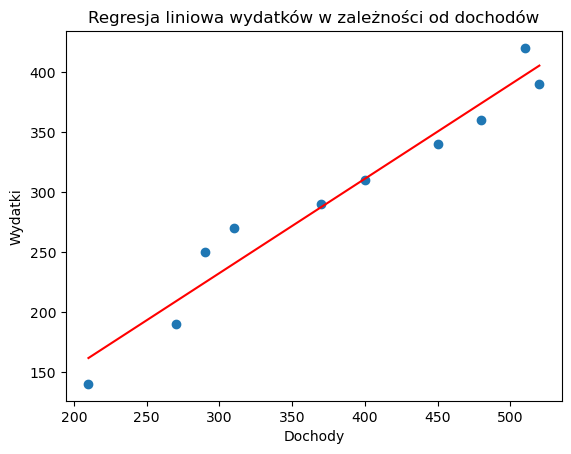

In [6]:
# ===== Twoja implementacja tutaj =====
l = len(w)
srednia_w = sum(w) / len(w)
srednia_d = sum(d) / len(d)

licznik = sum((d[i] - srednia_d) * (w[i] - srednia_w) for i in range(l))
mianownik = sum((d[i] - srednia_d) ** 2 for i in range(l))

b_hat = licznik / mianownik
a_hat = srednia_w - b_hat * srednia_d
print(f"Prosta regresji liniowej: w = {a_hat:.2f} + {b_hat:.2f} * d")

errors1 = []
for i in range(l):
    error = w[i] - (a_hat + b_hat * d[i])
    errors1.append(error)
norm_errors1 = np.linalg.norm(errors1)
print(f"Dla metody simple linear regression otrzymano błąd równy {norm_errors1:.2f}")

# Sprawdzimy również za pomocą funkcji np.polyfit() z biblioteki NumPy
b_hat_np, a_hat_np = np.polyfit(d, w, 1)

errors2 = []
for i in range(l):
    error = w[i] - (a_hat_np + b_hat_np * d[i])
    errors2.append(error)
norm_errors2 = np.linalg.norm(errors2)
print(f"Dla metody np.polyfit() otrzymano błąd równy {norm_errors2:.2f}")


plt.plot(d, w, 'o')
plt.xlabel('Dochody')
plt.ylabel('Wydatki')
plt.title('Regresja liniowa wydatków w zależności od dochodów')
plt.plot(d, a_hat + b_hat * d, 'r-')
plt.show()

***Do zadania 3***
W zadaniu trzecim należało utworzyć prostą regresji liniowej metodą simple linear regression, sprawdziąc jej skuteczność i dowiedzieć się, czy można to zrobić lepiej.
Posługując się artykułem zamieszczonym w poleceniu wyznaczono współczynniki alfa i beta. Następnie sprawdzono jaki mamy błąd dla tej metody poprzez zebranie odległości punktów od wyznaczonej prostej i obliczenie normy z wektora odległości.
Skuteczność tej metody porównano z wbudowaną w bibliotekę numpy funkcją do dopasowywania wielomianowego *np.polyfit()*. Błąd wyszedł dla obu metoda taki sam, a zatem metoda simple linear regression to dobre dopasowanie.

**Wnioski:** Obie metody przyniosły takie same rezultaty - jak również widać na przygotowanym powyżej wykresie linia bardzo dobrze odwzorowywuje to jak zachowują się dane. Warto jednak zauważyć, że zastosowanie funkcji *np.polyfit()* jest o wiele łatwiejsze w implementacji.

---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.

In [7]:
# ===== Twoja implementacja tutaj =====


---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)